In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.base import clone

In [2]:
%matplotlib inline

In [3]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,
                                                    stratify=iris.target, random_state=42)

# Support Vector Classification (SVC)

In [4]:
from sklearn.svm import SVC

## Linear Kernel

In [5]:
def plotContour(model):
    plot_model = clone(model)
    plot_model.fit(X_train[:,:2], y_train)

    x = np.linspace(np.min(X_train[:,0])-1, np.max(X_train[:,0])+1, 300)
    y = np.linspace(np.min(X_train[:,1])-1, np.max(X_train[:,1])+1, 300)
    xx, yy = np.meshgrid(x, y)
    z = plot_model.predict(np.column_stack((xx.reshape(-1,1), yy.reshape(-1,1)))).reshape(len(x),len(y))

    plt.figure(figsize=(12,8))
    plt.contourf(x,y,z, alpha=0.5)
    plt.scatter(X_train[:,0], X_train[:,1], s=50, c=y_train, cmap='rainbow')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

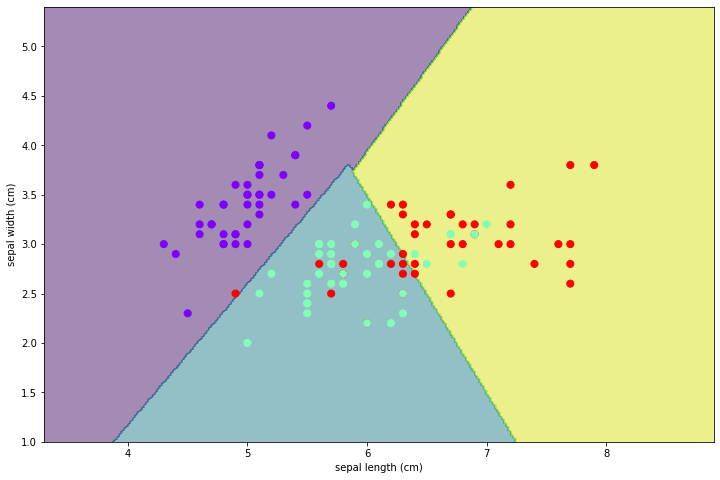

In [6]:
svc_model = SVC(kernel='linear', gamma='auto')
plotContour(svc_model)

## Polynomial Kernel

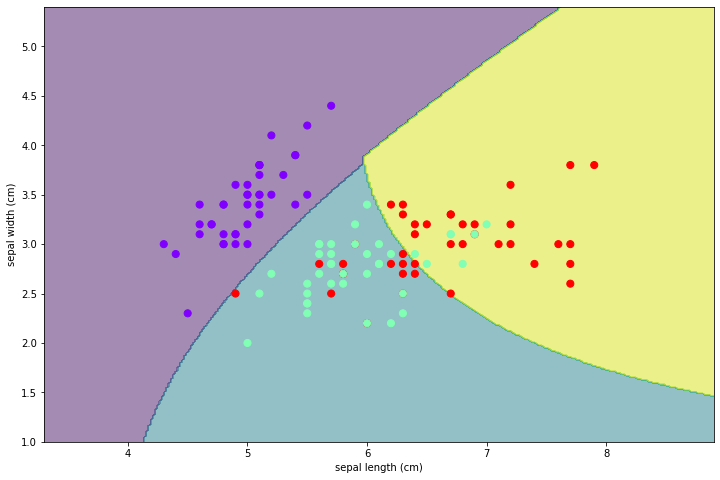

In [7]:
svc_model = SVC(kernel='poly', gamma='auto')
plotContour(svc_model)

## RBF Kernel (Radial Basis Function)

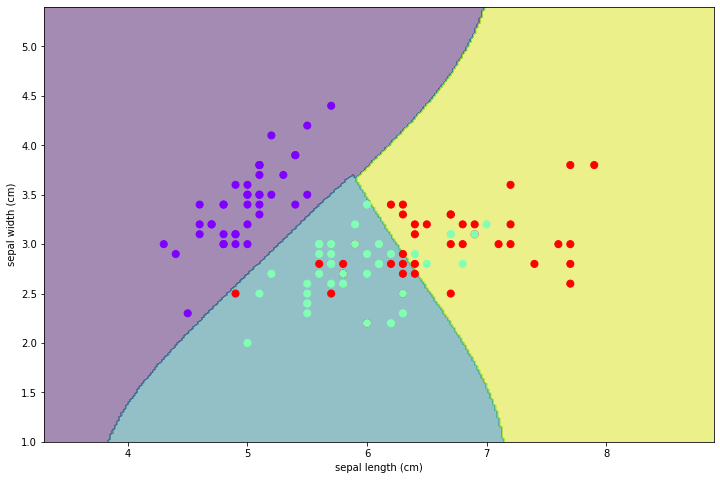

In [8]:
svc_model = SVC(kernel='rbf', gamma='auto')
plotContour(svc_model)

## Sigmoid Kernel

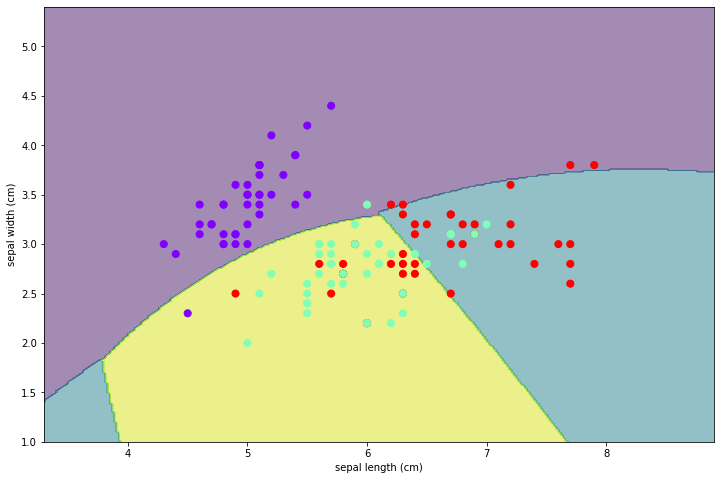

In [9]:
svc_model = SVC(kernel='sigmoid', gamma=0.02, degree=3)
plotContour(svc_model)

In [10]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [11]:
svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)
train_pred = svc_model.predict(X_train)
test_pred = svc_model.predict(X_test)

print("Training f1 score: ", round(f1_score(y_train, train_pred, average='micro'), 3), 
          "\nConfusion:\n", confusion_matrix(y_train, train_pred))
print("    Test f1 score: ", round(f1_score(y_test, test_pred, average='micro'), 3), 
          "\nConfusion:\n", confusion_matrix(y_test, test_pred))

Training f1 score:  0.983 
Confusion:
 [[40  0  0]
 [ 0 39  1]
 [ 0  1 39]]
    Test f1 score:  0.967 
Confusion:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


# GridSearch

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = [{'kernel':['linear', 'poly', 'rbf'], 'gamma':['auto']}, 
              {'kernel':['sigmoid'], 'gamma':np.linspace(1/100,1/1000,10)}]
clf = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

In [14]:
clf.fit(iris.data, iris.target)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'gamma': ['auto'],
                          'kernel': ['linear', 'poly', 'rbf']},
                         {'gamma': array([0.01 , 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002,
       0.001]),
                          'kernel': ['sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
clf.cv_results_['params']

[{'gamma': 'auto', 'kernel': 'linear'},
 {'gamma': 'auto', 'kernel': 'poly'},
 {'gamma': 'auto', 'kernel': 'rbf'},
 {'gamma': 0.01, 'kernel': 'sigmoid'},
 {'gamma': 0.009000000000000001, 'kernel': 'sigmoid'},
 {'gamma': 0.008, 'kernel': 'sigmoid'},
 {'gamma': 0.007, 'kernel': 'sigmoid'},
 {'gamma': 0.006, 'kernel': 'sigmoid'},
 {'gamma': 0.005, 'kernel': 'sigmoid'},
 {'gamma': 0.004, 'kernel': 'sigmoid'},
 {'gamma': 0.003, 'kernel': 'sigmoid'},
 {'gamma': 0.002, 'kernel': 'sigmoid'},
 {'gamma': 0.001, 'kernel': 'sigmoid'}]

In [16]:
clf.cv_results_['mean_test_score']

array([0.98      , 0.96666667, 0.98      , 0.84      , 0.84      ,
       0.85333333, 0.89333333, 0.92      , 0.93333333, 0.94666667,
       0.93333333, 0.93333333, 0.91333333])

In [17]:
resultDf = pd.DataFrame(clf.cv_results_['mean_test_score'], columns=['score'])
resultDf['gamma'] = [e['gamma'] for e in clf.cv_results_['params']]
resultDf['kernel'] = [e['kernel'] for e in clf.cv_results_['params']]

In [18]:
resultDf.sort_values(by='score', ascending=False)

,score,gamma,kernel
0,0.980000,auto,linear
2,0.980000,auto,rbf
1,0.966667,auto,poly
9,0.946667,0.004,sigmoid
8,0.933333,0.005,sigmoid
10,0.933333,0.003,sigmoid
11,0.933333,0.002,sigmoid
7,0.920000,0.006,sigmoid
12,0.913333,0.001,sigmoid
6,0.893333,0.007,sigmoid


# Decision Trees

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
tree_clf = DecisionTreeClassifier()

In [21]:
tree_clf.fit(X_train, y_train)

train_pred = tree_clf.predict(X_train)
test_pred = tree_clf.predict(X_test)

print("Training f1 score: ", round(f1_score(y_train, train_pred, average='micro'), 3), "\nConfusion:\n", confusion_matrix(y_train, train_pred))
print("    Test f1 score: ", round(f1_score(y_test, test_pred, average='micro'), 3), "\nConfusion:\n", confusion_matrix(y_test, test_pred))

Training f1 score:  1.0 
Confusion:
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
    Test f1 score:  0.967 
Confusion:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


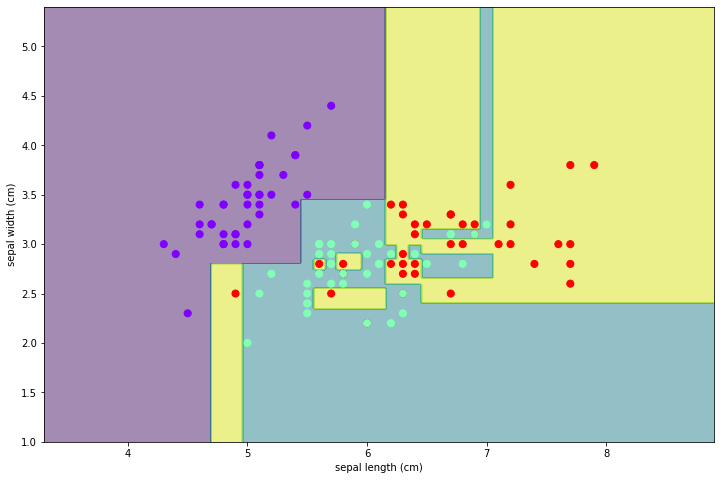

In [22]:
plotContour(tree_clf)

In [23]:
from sklearn.tree import export_graphviz
import graphviz

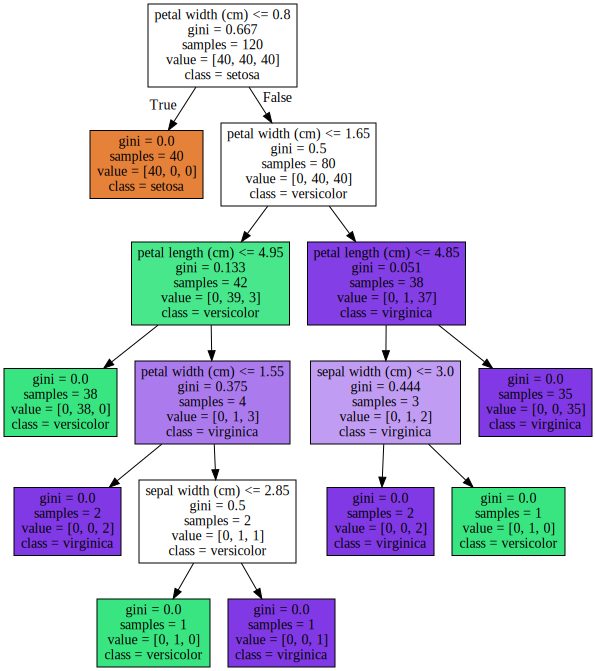

In [24]:
tree_data = export_graphviz(tree_clf, out_file=None, 
                feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graphviz.Source(tree_data)

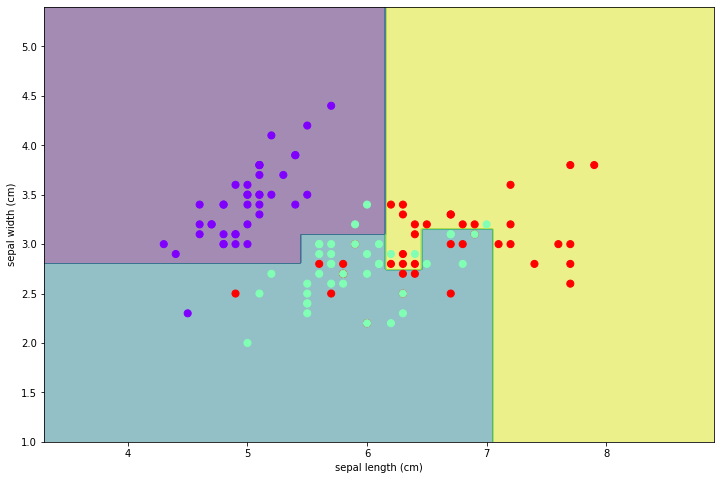

In [25]:
tree_clf = DecisionTreeClassifier(min_samples_leaf=5)
tree_clf.fit(X_train, y_train)
plotContour(tree_clf)

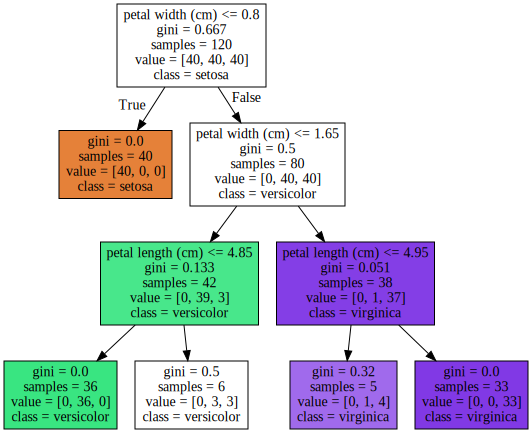

In [26]:
tree_data = export_graphviz(tree_clf, out_file=None, 
                feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graphviz.Source(tree_data)